In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix

In [2]:
from sklearn.datasets import load_iris

In [3]:
data= load_iris()

In [31]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

<AxesSubplot:>

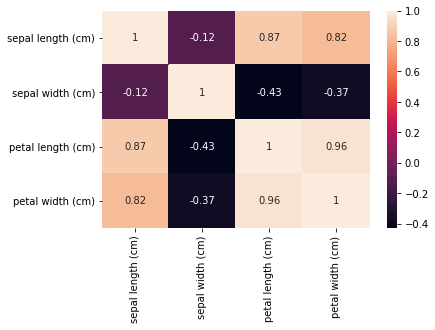

In [33]:
# sns.pairplot(X)
plt.figure()
sns.heatmap(X.corr(),annot=True)

In [35]:
X=X.drop(columns=['sepal width (cm)'],axis=1)
X.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


<AxesSubplot:>

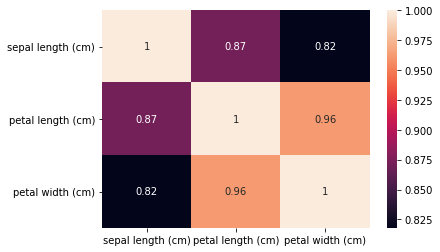

In [37]:
sns.heatmap(X.corr(),annot=True)


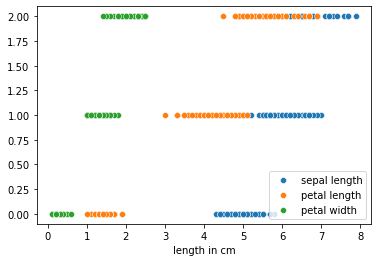

In [39]:
plt.figure()

plt.xlabel('length in cm')
sns.scatterplot(X.iloc[:,0],y) #sepal length
sns.scatterplot(X.iloc[:,1],y) #petal length
sns.scatterplot(X.iloc[:,2],y) #petal width
label = ['sepal length', 'petal length', 'petal width']
plt.legend(label)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.25)

In [43]:
%%time
logreg = LogisticRegression(random_state=5)
logreg.fit(x_train,y_train) 

Wall time: 73 ms


LogisticRegression(random_state=5)

In [45]:
%%time
ypred = logreg.predict(x_test)

Wall time: 6.09 ms


In [47]:
pd.DataFrame({'actual y':y_test , 'predicted':ypred}).head()

,actual y,predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2


In [49]:
accuracy_score(y_test,ypred),confusion_matrix(y_test,ypred)

(0.9736842105263158,
 array([[18,  0,  0],
        [ 0,  7,  1],
        [ 0,  0, 12]], dtype=int64))

In [51]:
pd.DataFrame({'actual y':y_test , 'predicted':ypred}).value_counts()

actual y  predicted
0         0            18
2         2            12
1         1             7
          2             1
dtype: int64

In [53]:
mean_squared_error(y_test,ypred)

0.02631578947368421

In [54]:
logreg.score(x_train,y_train),logreg.score(x_test,y_test)

(0.9821428571428571, 0.9736842105263158)

In [55]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
name = ['setosa', 'versicolor', 'virginica']


In [57]:
x=np.random.randint(x_test.shape[0])
print(x_test.iloc[x,:])
yhat = logreg.predict([x_test.iloc[x,:]])
print(f'\n real y[{x}] {name[y_test[x]]}, ------------- yhat[{x}] {name[yhat[0]]}')

sepal length (cm)    6.0
petal length (cm)    4.5
petal width (cm)     1.5
Name: 78, dtype: float64

 real y[5] versicolor, ------------- yhat[5] versicolor


In [58]:
logreg.coef_

array([[-0.32003328, -2.52535991, -1.0651285 ],
       [ 0.56812496, -0.1154076 , -0.84282223],
       [-0.24809168,  2.64076752,  1.90795074]])

<h2>Two Classes classification</h2>

In [24]:
class LogisticRegression:
    
    def __init__(self,learning_rate=0.01,iterations=100):
        self.learning_rate=learning_rate
        self.iterations=iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self,yp,y):                 
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp))[0]
    
    def fit(self, X, y):        
        self.loss = []
        ones= np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)
        self.weights = np.zeros(X.shape[1])
        for i in range(self.iterations):        
            # Gradient Descent
            z=np.dot(X,self.weights) 
            y_hat = self.sigmoid(z)
            self.weights -= self.learning_rate* np.dot(X.T,  y_hat - y) / y.size    
            # Saving Progress
            if i%100==0:
                self.loss.append(self.cost_function(y_hat,y)) 

    
    def predict(self, X):        
        ones= np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)
        # Predicting with sigmoid function
        z = np.dot(X, self.weights)
        # Returning binary result
        return  self.sigmoid(z)
    def loss_graph(self):
        sns.lineplot(x=range(self.iterations//100),y=self.loss)

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()


In [23]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
X=X.drop(columns=['sepal width (cm)'],axis=1)
y=pd.get_dummies(data.target)
y.value_counts()

0  1  2
0  0  1    50
   1  0    50
1  0  0    50
dtype: int64

In [8]:
class_0= y.iloc[:,0]
class_1= y.iloc[:,1]
class_2= y.iloc[:,2]
print(class_0.value_counts(),'\n\n',class_1.value_counts(),'\n\n',class_2.value_counts())
n_classes=[class_0,class_1,class_2]

0    100
1     50
Name: 0, dtype: int64 

 0    100
1     50
Name: 1, dtype: int64 

 0    100
1     50
Name: 2, dtype: int64


[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
[1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]


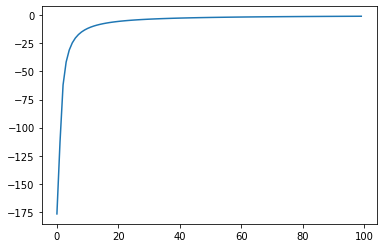

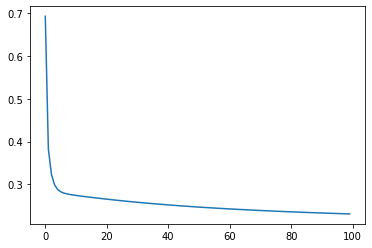

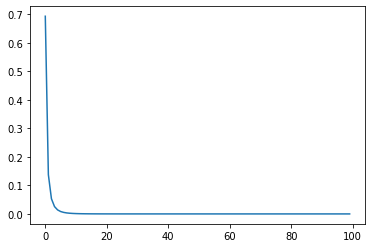

In [25]:
models= []
for i in n_classes:
    x_train,x_test,y_train,y_test = train_test_split(X,i,random_state=4,test_size=0.25)
    obj = LogisticRegression(learning_rate=0.03,iterations=10000)
    obj.fit(x_train,y_train)
    res=obj.predict(x_test)
    print(res.round())
    plt.figure()
    obj.loss_graph()
    models.append(obj)

In [26]:
models

In [30]:
for model in models:
    ypred=[]
    x=np.array(x_test)
    # print(x)
    res = model.predict(x)
    df =pd.DataFrame({'actual y':y_test , 'predicted':res.round()}).value_counts()
    print(df)
    ypred.append(res)

actual y  predicted
0         1.0          18
1         0.0          12
0         0.0           8
dtype: int64
actual y  predicted
0         0.0          21
1         0.0           6
          1.0           6
0         1.0           5
dtype: int64
actual y  predicted
0         0.0          24
1         1.0          11
0         1.0           2
1         0.0           1
dtype: int64


In [47]:
def Model_predict(x):    
    ypred=[]
    for model in models:
        x=np.array(x)
        # print(x)
        res = model.predict(x)
        ypred.append(res)
    print(ypred.index(max(ypred)))

In [59]:
x_train.shape,data.target[120]

((112, 3), 2)

In [60]:
x=X.iloc[120,:]
x=[x]
Model_predict(x)

2


In [176]:
X = data.data[:, :2]
y = (data.target != 0) * 1

# X = x_train
# y = y_train

In [32]:
lg.fit(x_train,y_train)

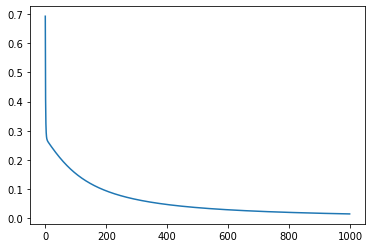

In [33]:
lg.loss_graph()

In [34]:
ypred=lg.predict(x_test)
ypred

array([0.99169738, 0.1400719 , 0.99951893, 0.99931854, 0.99898674,
       0.9600961 , 0.98370078, 0.07953207, 0.04183189, 0.98898292,
       0.46619509, 0.0726991 , 0.33033754, 0.96970989, 0.98467763,
       0.29299854, 0.98860139, 0.12876527, 0.0726991 , 0.9930155 ,
       0.25825244, 0.9657951 , 0.99906174, 0.12188318, 0.12876527,
       0.02851514, 0.83959941, 0.04183189, 0.30316923, 0.97150096,
       0.73244026, 0.09997192, 0.99910623, 0.39626731, 0.95619994,
       0.9657951 , 0.99466696, 0.9818148 ])

In [50]:
pd.DataFrame({'real val':y_test,'predicted':ypred.round()}).value_counts()

real val  predicted
1         0.0          17
0         1.0          12
1         1.0           9
dtype: int64

In [51]:
lg.weights

array([-0.62156291,  2.85616289, -4.59822592])